## Strava Data Exploration

This notebook uses a Python module `strava_analysis.py` to analyze and visualize activity data exported from Strava.

In [ ]:
#Check the functions available in the .py
import strava_analysis
dir(strava_analysis)


['Point',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'cm',
 'extract_lat_lon',
 'folium',
 'gpd',
 'load_strava_data',
 'map_activities_colored_by_speed',
 'map_df',
 'pd',
 'plot_speed_distribution',
 'plt',
 'sns']

In [9]:
# Import your functions
from strava_analysis import load_strava_data, plot_speed_distribution, extract_lat_lon, map_df, map_activities_colored_by_speed

### 1. Load the data
We use a function `load_strava_data()` that selects relevant columns, parses dates, and removes incomplete rows.


In [10]:
#Use first function, upload the data
df = load_strava_data("strava_data.csv")
df

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_latlng,end_latlng,map.summary_polyline,start_time
0,Afternoon HIIT,15470552955,Workout,0.0,4531,0.000,0.000,0.0,2025-05-16,[],[],NaN,17:44:26
1,Evening HIIT,15460331668,Workout,0.0,3774,0.000,0.000,0.0,2025-05-15,[],[],NaN,18:24:27
2,Lunch Ride - Innersbachklamm,15449061470,Ride,102228.0,21805,4.688,18.043,545.7,2025-05-14,"[47.810196, 13.038183]","[47.810232, 13.038135]",oaybHkcqnAvMdFfBnr@{CZrCh@LbIqE`X~OpMaHzGqPnz@...,11:02:05
3,Night Workout,15439339287,Workout,0.0,4233,0.000,0.000,0.0,2025-05-13,[],[],NaN,20:38:54
4,Afternoon Workout,15426341743,Workout,0.0,7148,0.000,0.000,0.0,2025-05-12,[],[],NaN,17:59:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Morning Ride,9917797597,Ride,10296.7,3654,2.818,7.982,344.1,2023-06-10,"[4.297962170094252, -74.78609061799943]","[4.348327768966556, -74.83286884613335]",}ffYlumgMtCh@`@JzBb@l@^FF?NAJW~A{@nEQn@]t@aAbB...,07:35:28
216,Lunch Walk,9255579410,Walk,3998.6,3009,1.329,1.909,7.7,2023-02-25,"[4.75921, -74.066105]","[4.724326, -74.073518]",mf`\f~`cMtCc@rE_@b@AZEFBP?REJCfAITIt@Aj@GdBGdB...,12:39:16
217,Arbolito 🌲,8952619873,Ride,23473.4,7171,3.273,10.387,452.4,2023-01-06,"[4.297663, -74.784424]","[4.297661, -74.784449]",egfYjumgMhI|Af@XAj@oAtG{@fCqBzCcAj@qFhBoQhNy@f...,06:39:16
218,Ricaurte - Agua de Dios,8948754056,Ride,44084.1,6479,6.804,15.073,375.5,2023-01-05,"[4.295948, -74.786636]","[4.297545, -74.78435]",c{eYrwmgMV_@v@wDdBwFdH_RtHeL|RqPkTuIsFeBuQiHgK...,16:17:54


### 2. Visualize Speed
The function `plot_speed_distribution()` compares the average and max speeds using histograms.


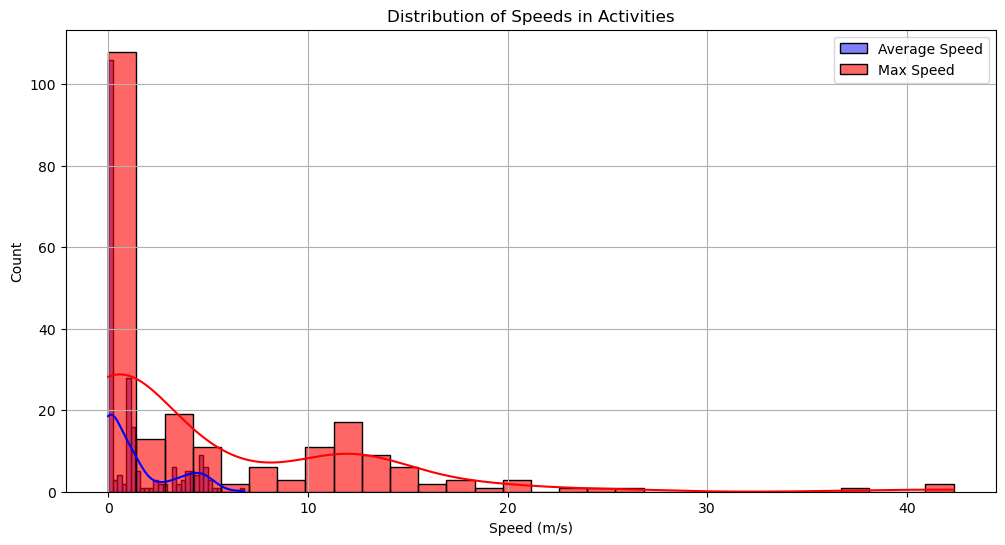

In [11]:
# plot speed distribution
plot_speed_distribution(df)

### 3.  Extract latitude and longitude

With `extract_lat_lon()`, we extract in two columns for each couple of coordenates separated information.

In [13]:
df['start_lat'], df['start_lon'] = zip(*df['start_latlng'].map(extract_lat_lon))
df['end_lat'], df['end_lon'] = zip(*df['end_latlng'].map(extract_lat_lon))
df

,name,upload_id,type,distance,moving_time,average_speed,max_speed,total_elevation_gain,start_date_local,start_latlng,end_latlng,map.summary_polyline,start_time,start_lat,start_lon,end_lat,end_lon
0,Afternoon HIIT,15470552955,Workout,0.0,4531,0.000,0.000,0.0,2025-05-16,[],[],NaN,17:44:26,NaN,NaN,NaN,NaN
1,Evening HIIT,15460331668,Workout,0.0,3774,0.000,0.000,0.0,2025-05-15,[],[],NaN,18:24:27,NaN,NaN,NaN,NaN
2,Lunch Ride - Innersbachklamm,15449061470,Ride,102228.0,21805,4.688,18.043,545.7,2025-05-14,"[47.810196, 13.038183]","[47.810232, 13.038135]",oaybHkcqnAvMdFfBnr@{CZrCh@LbIqE`X~OpMaHzGqPnz@...,11:02:05,47.810196,13.038183,47.810232,13.038135
3,Night Workout,15439339287,Workout,0.0,4233,0.000,0.000,0.0,2025-05-13,[],[],NaN,20:38:54,NaN,NaN,NaN,NaN
4,Afternoon Workout,15426341743,Workout,0.0,7148,0.000,0.000,0.0,2025-05-12,[],[],NaN,17:59:28,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Morning Ride,9917797597,Ride,10296.7,3654,2.818,7.982,344.1,2023-06-10,"[4.297962170094252, -74.78609061799943]","[4.348327768966556, -74.83286884613335]",}ffYlumgMtCh@`@JzBb@l@^FF?NAJW~A{@nEQn@]t@aAbB...,07:35:28,4.297962,-74.786091,4.348328,-74.832869
216,Lunch Walk,9255579410,Walk,3998.6,3009,1.329,1.909,7.7,2023-02-25,"[4.75921, -74.066105]","[4.724326, -74.073518]",mf`\f~`cMtCc@rE_@b@AZEFBP?REJCfAITIt@Aj@GdBGdB...,12:39:16,4.759210,-74.066105,4.724326,-74.073518
217,Arbolito 🌲,8952619873,Ride,23473.4,7171,3.273,10.387,452.4,2023-01-06,"[4.297663, -74.784424]","[4.297661, -74.784449]",egfYjumgMhI|Af@XAj@oAtG{@fCqBzCcAj@qFhBoQhNy@f...,06:39:16,4.297663,-74.784424,4.297661,-74.784449
218,Ricaurte - Agua de Dios,8948754056,Ride,44084.1,6479,6.804,15.073,375.5,2023-01-05,"[4.295948, -74.786636]","[4.297545, -74.78435]",c{eYrwmgMV_@v@wDdBwFdH_RtHeL|RqPkTuIsFeBuQiHgK...,16:17:54,4.295948,-74.786636,4.297545,-74.784350


### 4. Map the Activity starts and end points
With `map_df()`, we visualize where each activity began using folium.


In [14]:
#Show activity start points
fmap = map_df(df)
fmap

### 5. Map of average speead start points
With `map_activities_colored_by_speed()`, we visualize the activity start point color-coded by average speed.

In [16]:
speed_map = map_activities_colored_by_speed(df)
speed_map